# Import Libraries and load dataset

In [79]:
# Import Libraries and load datasetimport warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns

In [81]:
bank_df = pd.read_csv("bank.csv")
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Our target column is the last one (y = Exited)

In [82]:
bank_df.shape

(10000, 14)

In [83]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We can drop RowNumber, CustomerId and Surname straight away. Although Surname is not unique, the customer ID is unique, therefore the surnames, too

In [85]:
bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
#drop duplicates just in case
bank_df.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


No duplicate rows found

## EDA

### Univariate

In [87]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Everything seems normal here the mean and median look close to each other for all of them, as well as the max and min values don't seem odd

In [88]:
# Check skew

bank_df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

Not very skewed data (all values are max around 1)

In [89]:
#prepare some columns for the distplot

columns = bank_df.columns.to_list()
columns

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

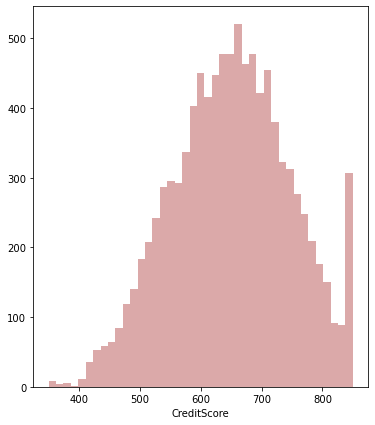

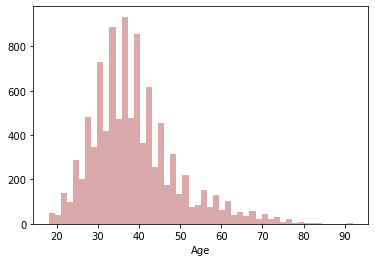

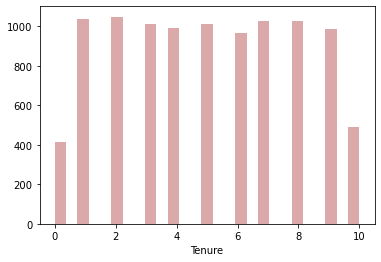

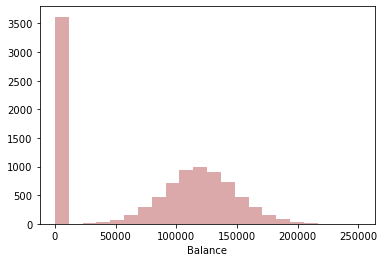

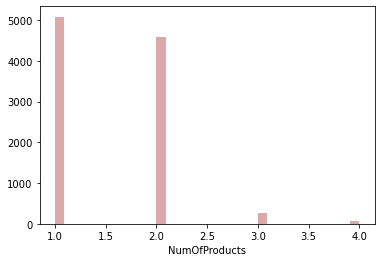

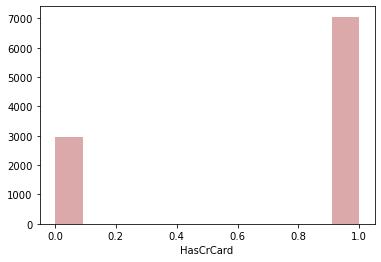

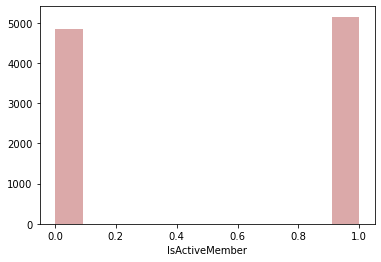

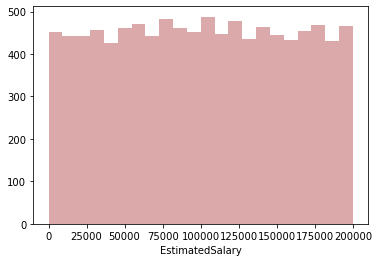

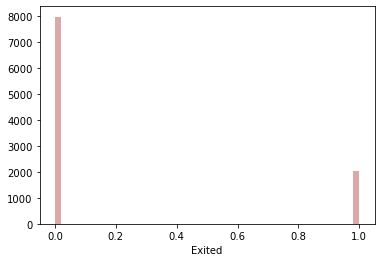

In [90]:
columns_to_plot = ['CreditScore','Age','Tenure','Balance','NumOfProducts',
                   'HasCrCard','IsActiveMember','EstimatedSalary','Exited']

plt.figure(figsize= (6,7))
for i in bank_df[columns_to_plot]:
    sns.distplot(bank_df[i], color = 'brown', kde = False)
    plt.show()

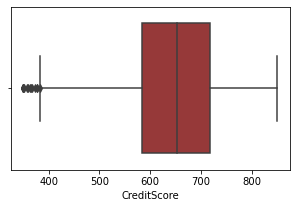

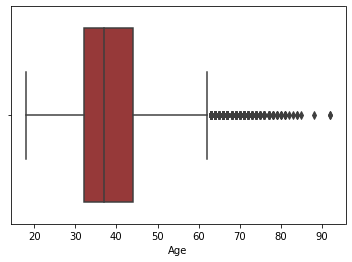

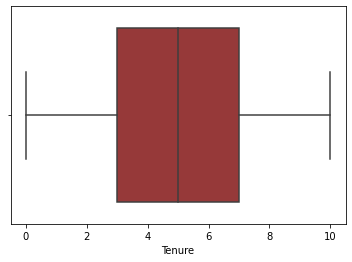

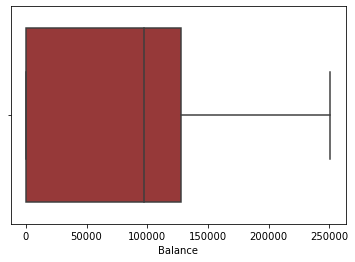

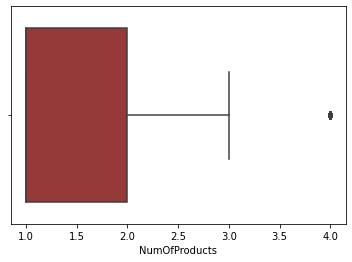

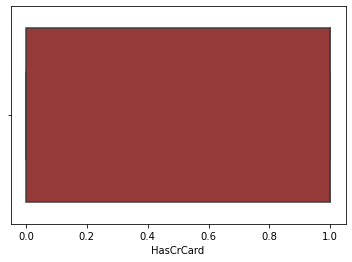

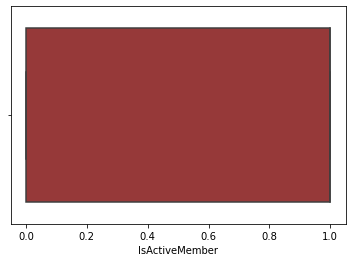

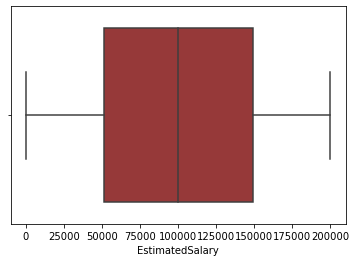

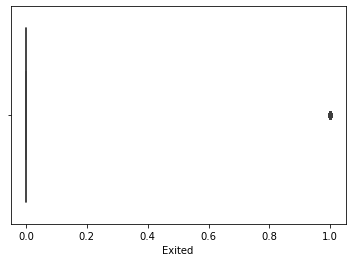

In [91]:
# Outliers check

plt.figure(figsize= (5,3))
for i in bank_df[columns_to_plot]:
    sns.boxplot(bank_df[i], color = 'brown')
    plt.show()

Some outliers are there, e.g. if we look at NumberOfProducts

### Bivariate

<Figure size 360x360 with 0 Axes>

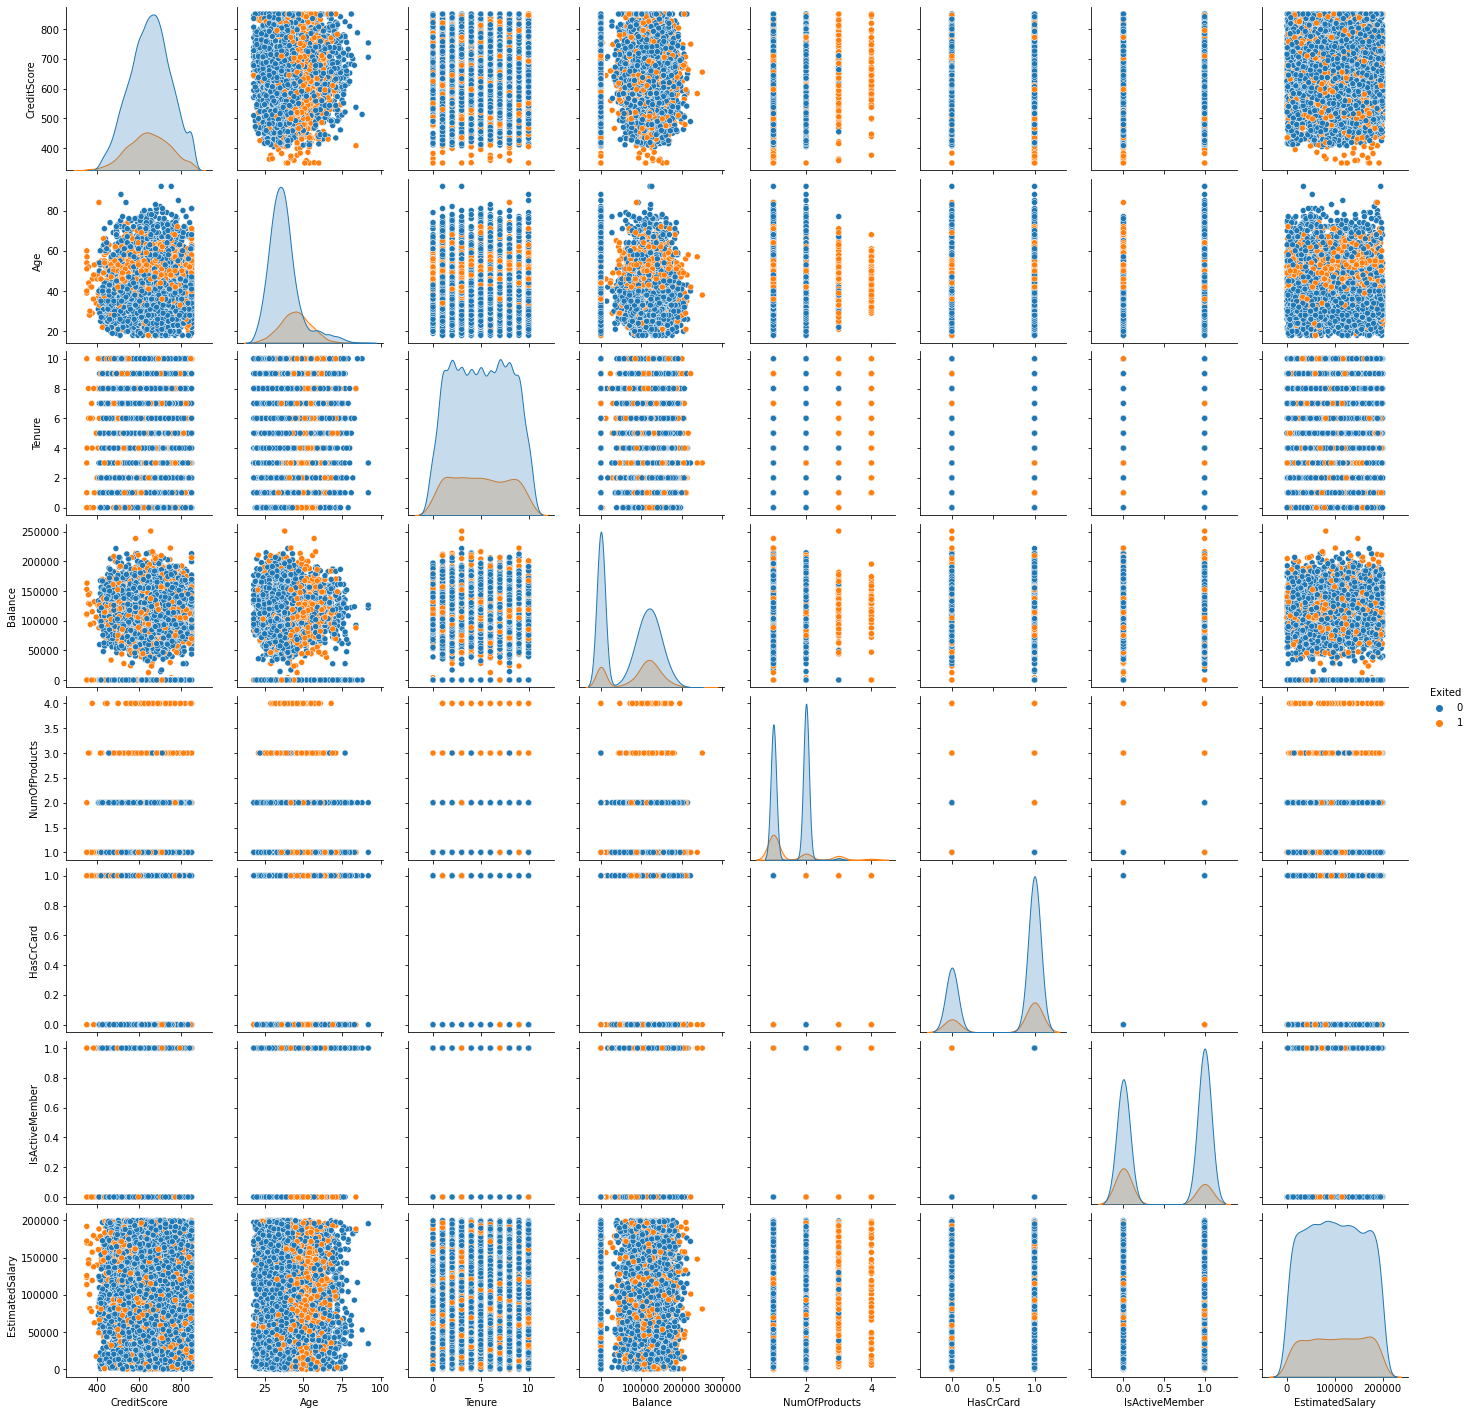

In [92]:
plt.figure(figsize=(5,5))
sns.pairplot(bank_df,diag_kind='kde', hue = 'Exited' )
plt.show()

There seem to be strong correlations here which would not show if we didn't  separate the graphs by the target column.

This is important since on many graphs we can cluster the data or twist the planes in order to separate it. For example Age and Estimated salary are strongly correlated.

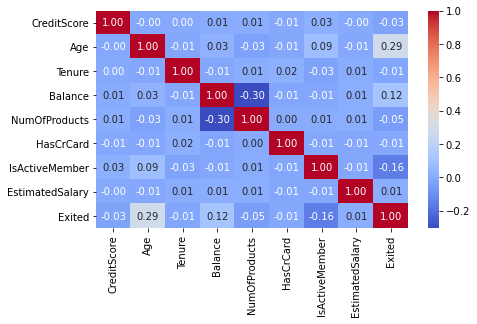

In [56]:
plt.figure(figsize=(7,4))
sns.heatmap(bank_df.corr(),annot=True,fmt='.2f',cmap='coolwarm' )
plt.show()

According to the heatmap there is a lot of independence (low correlation), but we know from the pairplot it is not a linear correlation

In [57]:
# converting these two into object although this is not necessary. They are boolean
bank_df['HasCrCard'] = bank_df['HasCrCard'].astype('object')
bank_df['IsActiveMember'] = bank_df['HasCrCard'].astype('object')

bank_df_d = pd.get_dummies(bank_df)
bank_df_d = bank_df_d.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
bank_df_d.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619.0,42.0,2.0,0.000000,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,608.0,41.0,1.0,83807.859375,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,699.0,39.0,1.0,0.000000,2.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [58]:

bank_df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float32
 1   Age                10000 non-null  float32
 2   Tenure             10000 non-null  float32
 3   Balance            10000 non-null  float32
 4   NumOfProducts      10000 non-null  float32
 5   EstimatedSalary    10000 non-null  float32
 6   Exited             10000 non-null  float32
 7   Geography_France   10000 non-null  float32
 8   Geography_Germany  10000 non-null  float32
 9   Geography_Spain    10000 non-null  float32
 10  Gender_Female      10000 non-null  float32
 11  Gender_Male        10000 non-null  float32
 12  HasCrCard_0        10000 non-null  float32
 13  HasCrCard_1        10000 non-null  float32
 14  IsActiveMember_0   10000 non-null  float32
 15  IsActiveMember_1   10000 non-null  float32
dtypes: float32(16)
memory u

In [ ]:
# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler()
# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler()


## Separating feature (X) and target (Y) / Scaling X with zscore

In [59]:
# using loc to separate X and Y

Y = bank_df_d.loc[:, 'Exited']
X = bank_df_d.loc[:, bank_df_d.columns != 'Exited']

In [60]:
# scaling with zscore
from scipy.stats import zscore

X = X.apply(zscore)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,-0.326222,0.293518,-1.041760,-1.225848,-0.911583,0.021887,0.997204,-0.578736,-0.573809,1.095987,-1.095987,-0.646092,0.646092,-0.646092,0.646092
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-1.002804,-0.578736,1.742740,1.095987,-1.095987,1.547768,-1.547768,1.547768,-1.547768
2,-1.536794,0.293518,1.032908,1.333053,2.527057,0.240687,0.997204,-0.578736,-0.573809,1.095987,-1.095987,-0.646092,0.646092,-0.646092,0.646092
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0.997204,-0.578736,-0.573809,1.095987,-1.095987,1.547768,-1.547768,1.547768,-1.547768
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,-1.002804,-0.578736,1.742740,1.095987,-1.095987,-0.646092,0.646092,-0.646092,0.646092


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [62]:
# Check the number of columns

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 15)
(2000, 15)
(8000,)
(2000,)


## Tuning with GridSearchCV: Batch Size, Epochs, Optimizers

sources: 
* learning material
* https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### Tune Batch Size and number of Epochs 

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create models, required for KerasClassifier

def create_model():
    
    # create model
    model = Sequential()
    model.add(Dense(36, input_shape = (15,), activation = 'relu')) # (15+2+1)*2
    model.add(Dense(18, activation = 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility

seed = 7
np.random.seed(seed)

# create model

model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters

batch_size = [10, 20, 50, 100, 500, 1000]
epochs = [10, 20, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs) # creating dictionary

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)


# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849000 using {'batch_size': 20, 'epochs': 20}
0.846700 (0.003458) with: {'batch_size': 10, 'epochs': 10}
0.848200 (0.003372) with: {'batch_size': 10, 'epochs': 20}
0.845200 (0.006426) with: {'batch_size': 10, 'epochs': 30}
0.843300 (0.007288) with: {'batch_size': 10, 'epochs': 50}
0.847900 (0.003612) with: {'batch_size': 20, 'epochs': 10}
0.849000 (0.004318) with: {'batch_size': 20, 'epochs': 20}
0.844400 (0.004361) with: {'batch_size': 20, 'epochs': 30}
0.844900 (0.002749) with: {'batch_size': 20, 'epochs': 50}
0.847000 (0.001701) with: {'batch_size': 50, 'epochs': 10}
0.847400 (0.003695) with: {'batch_size': 50, 'epochs': 20}
0.845700 (0.002877) with: {'batch_size': 50, 'epochs': 30}
0.846600 (0.006392) with: {'batch_size': 50, 'epochs': 50}
0.839700 (0.003604) with: {'batch_size': 100, 'epochs': 10}
0.848400 (0.003760) with: {'batch_size': 100, 'epochs': 20}
0.848200 (0.004916) with: {'batch_size': 100, 'epochs': 30}
0.846500 (0.004705) with: {'batch_size': 100, 'epochs': 50

### Tune Optimizers

In [64]:
# Function to create model, required for KerasClassifier

def create_model(optimizer='adam'):
    
    # create model
    model = Sequential()
    model.add(Dense(36, input_shape = (15,), activation = 'relu'))
    model.add(Dense(18, activation = 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

# fix random seed for reproducibility

seed = 7
np.random.seed(seed)

# create model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843300 using {'optimizer': 'SGD'}
0.843300 (0.006049) with: {'optimizer': 'SGD'}
0.841300 (0.004006) with: {'optimizer': 'RMSprop'}
0.805101 (0.007120) with: {'optimizer': 'Adagrad'}
0.794901 (0.005365) with: {'optimizer': 'Adadelta'}
0.832600 (0.004432) with: {'optimizer': 'Adam'}
0.841799 (0.007578) with: {'optimizer': 'Adamax'}
0.832100 (0.005022) with: {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [67]:
# Function to create model, required for KerasClassifier

def create_model(learn_rate=0.01, momentum=0):
    
    # create model
    model = Sequential()
    model.add(Dense(36, input_shape = (15,), activation = 'relu'))
    model.add(Dense(18, activation = 'tanh'))
    model.add(Dense(1, activation='sigmoid'))### Tune Optimizers
    
    # Compile model
    optimizer = optimizers.SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility

seed = 7
np.random.seed(seed)

# create model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20, verbose=0)

# define the grid search parameters

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848400 using {'learn_rate': 0.01, 'momentum': 0.6}
0.794100 (0.002679) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.794700 (0.003074) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.799401 (0.006729) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.799501 (0.007122) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.821000 (0.000779) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.839101 (0.006344) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.840600 (0.002509) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.842100 (0.002792) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.842300 (0.003572) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.848400 (0.002711) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.845900 (0.001721) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.841200 (0.001614) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.844800 (0.004683) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.846000 (0.006426) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.845100 (0.004274) with: {'learn_rate': 

## Best results run

### Building the model

In [68]:
# model shell
model = Sequential()

# neuron layers
model.add(Dense(36, input_shape = (15,), activation = 'relu'))
model.add(Dense(18, activation = 'tanh'))
model.add(Dense(1, activation='sigmoid'))

#defining optimizer
optimizer = optimizers.SGD(lr = 0.01, momentum = 0.6)

# defining loss
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 36)                576       
_________________________________________________________________
dense_32 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 19        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

Training the model

In [71]:
model.fit(X_train, y_train.values, batch_size = 20, epochs = 20, verbose = 1)

Epoch 1/20
400/400 [==============================] - 0s 694us/step - loss: 0.3362 - accuracy: 0.8614
Epoch 2/20
400/400 [==============================] - 0s 710us/step - loss: 0.3361 - accuracy: 0.8591
Epoch 3/20
400/400 [==============================] - 0s 687us/step - loss: 0.3350 - accuracy: 0.8604
Epoch 4/20
400/400 [==============================] - 0s 692us/step - loss: 0.3345 - accuracy: 0.8609
Epoch 5/20
400/400 [==============================] - 0s 738us/step - loss: 0.3337 - accuracy: 0.8609
Epoch 6/20
400/400 [==============================] - 0s 650us/step - loss: 0.3340 - accuracy: 0.8601
Epoch 7/20
400/400 [==============================] - 0s 695us/step - loss: 0.3330 - accuracy: 0.8625
Epoch 8/20
400/400 [==============================] - 0s 667us/step - loss: 0.3330 - accuracy: 0.8626
Epoch 9/20
400/400 [==============================] - 0s 710us/step - loss: 0.3326 - accuracy: 0.8605
Epoch 10/20
400/400 [==============================] - 0s 660us/step - loss: 0.331

### Evaluation

In [76]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 724us/step - loss: 0.3514 - accuracy: 0.8525


In [74]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.3513638973236084, 0.8525000214576721]


### Confusion Matrix

In [78]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

63/63 [==============================] - 0s 793us/step - loss: 0.3514 - accuracy: 0.8525
Accuracy Model1 (Dropout): 0.8525000214576721
Recall_score: 0.4433734939759036
Precision_score: 0.7419354838709677
F-score: 0.555052790346908


array([[1521,   64],
       [ 231,  184]], dtype=int64)

We achieved 0.8525 accuracy which is quite high, with a loss of 0.3514. It contains 1521 correctly predicted True, and 184 correctly predicted false.